In [1]:
import pprint
import torch
import time
import numpy as np
import matplotlib.pyplot as plt
import normflows as nf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import wasserstein_distance
from torch.utils.data import Dataset, TensorDataset, DataLoader, random_split
from scipy.stats import wasserstein_distance
from sklearn.decomposition import PCA
from torch import nn
from tqdm import tqdm

In [2]:
import utils
import nfhelp
#import importlib
#importlib.reload(utils)
#importlib.reload(nfhelp)

In [3]:
class args:
    dataset_limiter = 100000
    filepath = 'array3.txt'
    split = np.array([0.8, 0.1, 0.1])
    batch_size = 512
    bounds = np.array([-3, 3, -3, 3])
    lr = 5e-4
    dimensions = 10
    layers = 32

In [4]:
train_loader, train_np, valid_np, test_np = nfhelp.preprocess_samples(args.filepath, args.split, args.batch_size, args.dataset_limiter)
model = nfhelp.init_model(args.dimensions, args.layers)
pca = PCA(n_components=2)
trainingpca = pca.fit_transform(train_np)
generated_testing, info = nfhelp.train_and_sample(model, train_loader, valid_np, test_np, pca, args.bounds, args.lr)
pprint.pprint(info)

{'Architecture': 'NF',
 'Dimensions': 10,
 'Final KLD': 31.678592843768666,
 'Final WD': 0.0021055555555555563,
 'Iterations': 15,
 'Learnable parameters': 166228,
 'Speed (samples/s)': 26273.762281655116,
 'Training data amount': 80000}


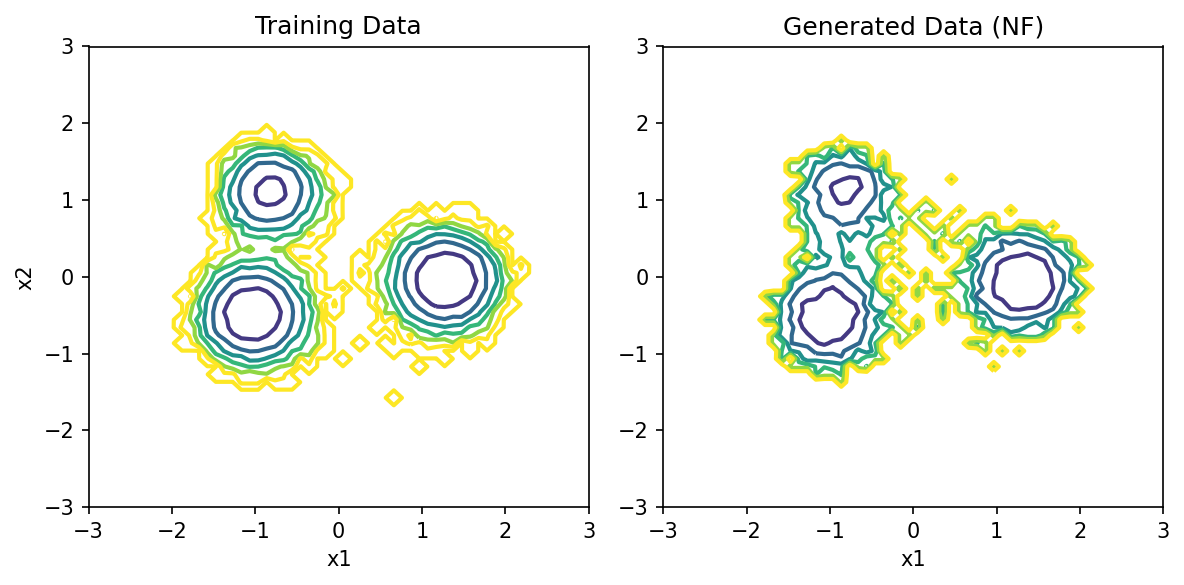

In [5]:
G_MD, xe_MD, ye_MD = utils.FE_hist(trainingpca, args.bounds, binw=0.1)
G_NF, xe_NF, ye_NF = utils.FE_hist(pca.transform(generated_testing), args.bounds, binw=0.1)

fig, axs = plt.subplots(1,2, figsize=(8,4), dpi=150, tight_layout=True);
axs[0].contour(G_MD.T, extent=[xe_MD[0], xe_MD[-1], ye_MD[0], ye_MD[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[1].contour(G_NF.T, extent=[xe_NF[0], xe_NF[-1], ye_NF[0], ye_NF[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].set_title("Training Data")
axs[1].set_xlabel("x1")
axs[1].set_title("Generated Data (NF)")
axs[0].set_xlim(args.bounds[0], args.bounds[1]);
axs[0].set_ylim(args.bounds[2], args.bounds[3]);
axs[1].set_xlim(args.bounds[0], args.bounds[1]);
axs[1].set_ylim(args.bounds[2], args.bounds[3]);